<a href="https://colab.research.google.com/github/gastonbujia/curso-visualizacion-datos-SAN-2022/blob/main/notebooks/Actividades/soluciones/calciumImaging_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stringer orientations data (calcium imaging)**

## Info de los datos:

<center>
<img src='https://www.cell.com/cms/attachment/48837ed7-e79a-44ae-ba05-426c017c303a/gr1.jpg' height=450>
</center>

* Fuente: https://compneuro.neuromatch.io/projects/neurons/README.html#stringer
* Video explicativo: https://www.youtube.com/watch?v=78GSgf6Dkkk&ab_channel=NeuromatchAcademy





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import pandas as pd

In [ ]:
#@title Corre esta celda para descargar los datos
import os, requests

fname = "stringer_orientations.npy"
url = "https://osf.io/ny4ut/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Error al intentar descargar !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Error al intentar descargar !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [ ]:
#@title Configuracion para las figuras
from matplotlib import rcParams

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [ ]:
# Data loading
dat = np.load('stringer_orientations.npy', allow_pickle=True).item()
print(dat.keys())


dict_keys(['sresp', 'istim', 'stat', 'u_spont', 'v_spont', 'mean_spont', 'std_spont', 'stimtimes', 'frametimes', 'camtimes', 'run', 'info', 'xyz'])


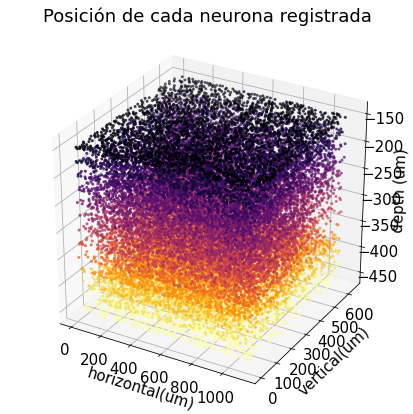

In [ ]:
# Graficando la posicion de las neuronas en 3D 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x, y, z = dat['xyz']

zunq, iunq = np.unique(z, return_inverse=True)
xc = np.linspace(0.0, 1.0, len(zunq))
cmap = cm.get_cmap('inferno')(xc)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[::-1], y[::-1], z[::-1], 'o', s=4, c=cmap[iunq])
ax.set(xlabel='horizontal(um)', ylabel='vertical(um)', zlabel='depth (um)')
plt.title('Posición de cada neurona registrada')
ttl = ax.title
ttl.set_position([.5, 1.01])
plt.show()

[Text(0, 0.5, 'neural response'), Text(0.5, 0, 'running')]

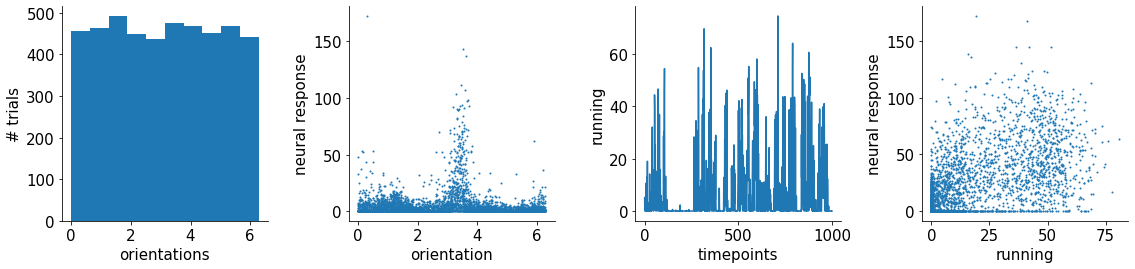

In [ ]:
# Agunos Plots
ax = plt.subplot(1, 5, 1)
plt.hist(dat['istim'])
ax.set(xlabel='orientations', ylabel='# trials')

ax = plt.subplot(1, 5, 2)
plt.scatter(dat['istim'], dat['sresp'][1000], s=1)
ax.set(xlabel='orientation', ylabel='neural response')

ax = plt.subplot(1, 5, 3)
plt.plot(dat['run'][:1000])
ax.set(xlabel='timepoints', ylabel='running')

ax = plt.subplot(1, 5, 4)
plt.scatter(dat['run'], dat['sresp'][20998], s=1)
ax.set(xlabel='running', ylabel='neural response')

In [ ]:
# Pasamos del diccionario a un DataFrames de Pandas

# Esto se llama "lista por comprension", una manera que tiene Python de hacer un for y meter el resultado en una lista
# Basicamente creo columnas que se llaman "neurona_n" 
columnas = [f'neurona_{i+1}' for i in range(dat['sresp'].shape[0])]

# Creo DF en base a la respuesta de las neuronas
df_actividad = pd.DataFrame([dat['sresp'][:, i] for i in range(dat['sresp'].shape[1])])
df_actividad.columns = columnas

# Creo DF en base a la posicion de las neuronas
df_posicion = pd.DataFrame([dat['xyz'][i] for i in range(3)], index=['x', 'y', 'z'])
df_posicion.columns = columnas

# Creo DF en base a la posicion DEL ESTIMULO presentado
df_estimulos = pd.DataFrame(dat['istim'], columns=['rotacion'])

# Creo DF con datos estadisticos sobre las celulas obtenidos con la libreria suite2p
stat_cols = ['xpix', 'ypix', 'med', 'aspect_ratio']
df_stats = pd.DataFrame.from_records(dat['stat'])[stat_cols]

# ¡Los datos!

**Breve descripción del experimento:** We recorded from V1 in awake, head-fixed mice that were free to run on an air-floating ball (Figure 1A). Our main stimuli were static gratings of a random orientation on each trial, which lasted for 750 ms, followed by 250 ms of gray screen. We recorded neural activity from visual cortex using multi-plane two-photon calcium imaging, with 10–17 planes spaced 25 μm apart in depth, scanning the entire stack repeatedly at an average of  ∼ 3 Hz.

<center>
<img src='https://www.cell.com/cms/attachment/48837ed7-e79a-44ae-ba05-426c017c303a/gr1.jpg' height=450>
</center>


DataFrames para trabajar:

* `df_actividad` 
  * 23589 columnas. Una por neurona registrada.
  * 4597 filas. Una por cada tipo de estímulo presentado.
  * Cada celda contiene entonces la actividad neuronal para una determinada neurona ante un determinado estímulo.

- `df_estimulos` 
  * 1 columna. La rotacion del estimulo presentado (desde 0 a 2Pi)
  * 4597 filas. Una por estímulo presentado.

- `df_posicion` 
  * 1 columna.

* `df_stats` 
  * Contiene algunas estadísticas para cada neurona (se obtuvieron con el software [suite2py](https://suite2p.readthedocs.io/en/latest/index.html)). Se los compartimos más que nada para que sepan cómo podrían pasar de un dato crudo al procesado que estamos compartiéndoles.
    * En paticular:
      * *ypix*: y-pixels of cell.
      * *xpix*: x-pixels of cell.
      * *med*: (y,x) center of cell.
      * *aspect_ratio*: ratio between major and minor axes of a 2D Gaussian fit to mask

<hr>

* **Preguntitas**
1. Que neurona se activo mas en promedio? y cual menos? (buscar las 10 que se activaron mas y las 10 que se activaron menos)

2. Hay una direccion del estimulo que active mas neuronas? Si esa direccion existe cual es?

3. ¿Que neurona tiene mas veces el valor 0?

4. Las 10 neuronas que se activaron más y aquellas 10 que se activaron menos estaban cerca en el espacio?
* Para esta última pueden usar una funcion que mida la distancia (no es más que la distancia euclidea entre dos puntos en R^3): https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html

In [ ]:
# Respuestas posibles
# Pregunta 1
diez_mas_activadas = df_actividad.mean(axis=0).sort_values(ascending=False)[:10]
diez_mas_activadas_index = list(diez_mas_activadas.index)
diez_mas_activadas_df = df_posicion.loc[:, diez_mas_activadas_index]
display(diez_mas_activadas_df)

# Pregunta 3 de dos formas  distintas
# forma 1
df_actividad.apply(lambda x: x == 0, axis=0).sum(axis=0).sort_values(ascending=False)

# forma 2
df_actividad.isin([0]).sum(axis=0).sort_values(ascending=False)

In [ ]:
diez_mas_activadas_df

,neurona_1854,neurona_1825,neurona_6922,neurona_16618,neurona_46,neurona_2060,neurona_56,neurona_14458,neurona_6,neurona_1955
x,504.00,488.0,14.00,528.00,100.00,764.00,422.00,359.00,320.00,118.00
y,304.57,319.2,365.75,154.28,90.44,303.24,284.62,163.59,178.22,70.49
z,-175.00,-175.0,-250.00,-375.00,-150.00,-175.00,-150.00,-350.00,-150.00,-175.00


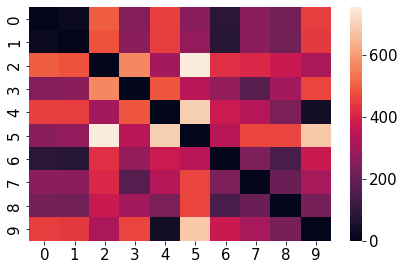

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns


rcParams['figure.figsize'] = [6, 4]

# Aca use `.T` para transponer la matriz
distances = euclidean_distances(X=diez_mas_activadas_df.T) 
sns.heatmap(distances)


In [ ]:
pd.DataFrame(distances)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,21.680334,499.467709,251.322669,457.922108,260.003402,88.017058,267.442256,224.600362,451.430445
1,21.680334,0.000000,482.149253,262.294884,451.109895,276.461067,78.592470,267.358322,220.735952,445.821337
2,499.467709,482.149253,0.000000,569.684615,305.272986,756.328302,427.838845,412.181593,372.563419,321.899779
3,251.322669,262.294884,569.684615,0.000000,487.734093,343.343970,280.801559,171.092595,307.346911,463.811130
4,457.922108,451.109895,305.272986,487.734093,0.000000,697.714010,376.018447,335.308697,236.865634,36.701533
5,260.003402,276.461067,756.328302,343.343970,697.714010,0.000000,343.417682,462.765732,461.942638,686.650248
6,88.017058,78.592470,427.838845,280.801559,376.018447,343.417682,0.000000,242.110018,147.393894,372.683052
7,267.442256,267.358322,412.181593,171.092595,335.308697,462.765732,242.110018,0.000000,204.291549,312.047448
8,224.600362,220.735952,372.563419,307.346911,236.865634,461.942638,147.393894,204.291549,0.000000,230.292755
9,451.430445,445.821337,321.899779,463.811130,36.701533,686.650248,372.683052,312.047448,230.292755,0.000000


In [ ]:
diez_mas_activadas_df

,neurona_1854,neurona_1825,neurona_6922,neurona_16618,neurona_46,neurona_2060,neurona_56,neurona_14458,neurona_6,neurona_1955
x,504.00,488.0,14.00,528.00,100.00,764.00,422.00,359.00,320.00,118.00
y,304.57,319.2,365.75,154.28,90.44,303.24,284.62,163.59,178.22,70.49
z,-175.00,-175.0,-250.00,-375.00,-150.00,-175.00,-150.00,-350.00,-150.00,-175.00
